/home/bongiwe/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


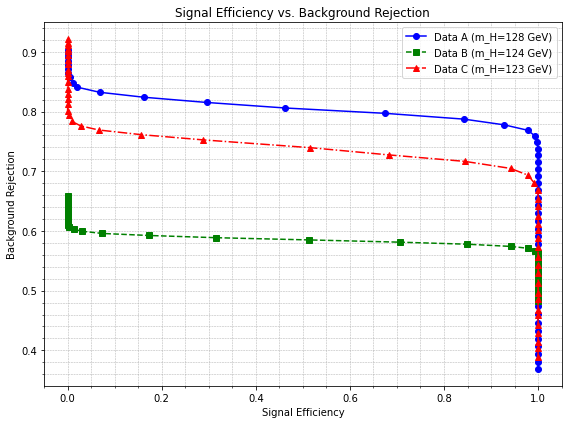

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define cut thresholds for ROC analysis
cut_values = np.arange(110, 135, 0.5)  # Adjusted to cover all relevant signal regions

# Function to compute signal efficiency and background rejection
def compute_roc(signal_data, background_data, cuts):
    signal_efficiency = []
    background_rejection = []

    for cut in cuts:
        signal_pass = signal_data[signal_data > cut]
        background_pass = background_data[background_data > cut]

        signal_eff = len(signal_pass) / len(signal_data)
        background_rej = 1 - (len(background_pass) / len(background_data))

        signal_efficiency.append(signal_eff)
        background_rejection.append(background_rej)

    return signal_efficiency, background_rejection

# --- Data A ---
signal_data_A = np.random.normal(128, 1, 1000)
background_data_A = np.random.normal(115, 15, 50000)
se_A, br_A = compute_roc(signal_data_A, background_data_A, cut_values)

# --- Data B ---
signal_data_B = np.random.normal(124, 1, 1500)
background_data_B = np.random.normal(112, 54, 58000)
se_B, br_B = compute_roc(signal_data_B, background_data_B, cut_values)

# --- Data C ---
signal_data_C = np.random.normal(123, 1, 650)
background_data_C = np.random.normal(114, 15, 2300)
se_C, br_C = compute_roc(signal_data_C, background_data_C, cut_values)

# Plotting all on the same figure
plt.figure(figsize=(8, 6))
plt.plot(se_A, br_A, marker='o', linestyle='-', label='Data A (m_H=128 GeV)', color='blue')
plt.plot(se_B, br_B, marker='s', linestyle='--', label='Data B (m_H=124 GeV)', color='green')
plt.plot(se_C, br_C, marker='^', linestyle='-.', label='Data C (m_H=123 GeV)', color='red')

plt.xlabel('Signal Efficiency')
plt.ylabel('Background Rejection')
plt.title('Signal Efficiency vs. Background Rejection')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.savefig("combined_signal_eff_vs_bkg_rej.png")
plt.show()
